In [2]:
from sklearn.cluster import KMeans , AgglomerativeClustering , DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score

In [4]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
scaler  = StandardScaler()
scaled_df = scaler.fit_transform(df.iloc[:,:-1])
scaled_df = pd.DataFrame(scaled_df , columns = list(df.columns)[:-1])
scaled_df["class"] = df["class"]
scaled_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


In [21]:
X = scaled_df.iloc[:,:-1]
Y = scaled_df["class"]

In [22]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [24]:
center = kmeans.cluster_centers_
center

array([[-0.05021989, -0.88337647,  0.34773781,  0.2815273 ],
       [-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [ 1.13597027,  0.08842168,  0.99615451,  1.01752612]])

In [25]:
identified_clusters = kmeans.fit_predict(X)
identified_clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [26]:
temp1 = X[identified_clusters == 0]
temp2 = X[identified_clusters == 1]
temp3 = X[identified_clusters == 2]

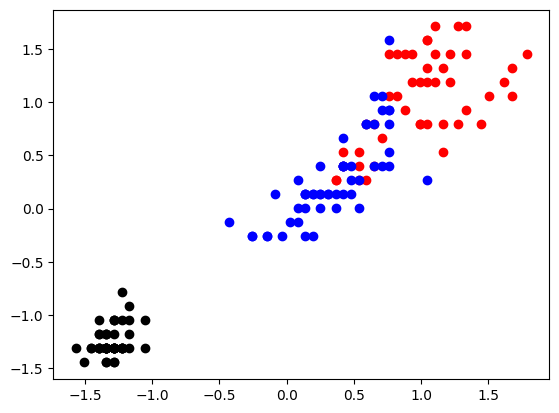

In [27]:
plt.scatter(temp1.iloc[:,2] , temp1.iloc[:,3] , color = 'red')
plt.scatter(temp2.iloc[:,2] , temp2.iloc[:,3] , color = 'black')
plt.scatter(temp3.iloc[:,2] , temp3.iloc[:,3] , color = 'blue')
plt.show()

DBSCAN

In [28]:
from sklearn.neighbors import NearestNeighbors

In [29]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances , indices = nbrs.kneighbors(X)

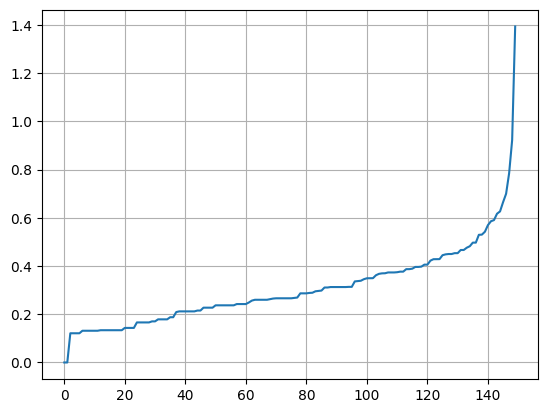

In [30]:
distances = np.sort(distances , axis = 0)
distances = distances[:,1]
plt.plot(distances)
plt.grid()
plt.show()

In [31]:
dbscan = DBSCAN(eps=0.6 , min_samples = 3)
dbscan.fit(X)

DBSCAN(eps=0.6, min_samples=3)

In [32]:
identified_clusters_db = dbscan.fit_predict(X)
identified_clusters_db

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  2,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,
        3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  3,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  2,  1,  1,  1,
        1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [33]:
unique_clusters = np.unique(identified_clusters_db)
unique_clusters

array([-1,  0,  1,  2,  3])

In [36]:
li = []
for i in range(len(unique_clusters)):
  li.append(X[identified_clusters_db==unique_clusters[i]])

In [37]:
li

[     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 41           -1.627688         -1.743357          -1.397064         -1.183812
 60           -1.021849         -2.433947          -0.146641         -0.262387
 62            0.189830         -1.973554           0.137547         -0.262387
 106          -1.143017         -1.282963           0.421734          0.659038
 108           1.038005         -1.282963           1.160620          0.790671
 109           1.643844          1.249201           1.331133          1.712096
 117           2.249683          1.709595           1.672157          1.317199
 118           2.249683         -1.052767           1.785832          1.448832
 131           2.492019          1.709595           1.501645          1.053935,
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0           -0.900681          1.019004          -1.340227         -1.315444
 1           -1.143017         -0.131979          -1.

In [39]:
import random
no_of_colors = len(li)

color = ['#'+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(no_of_colors)]

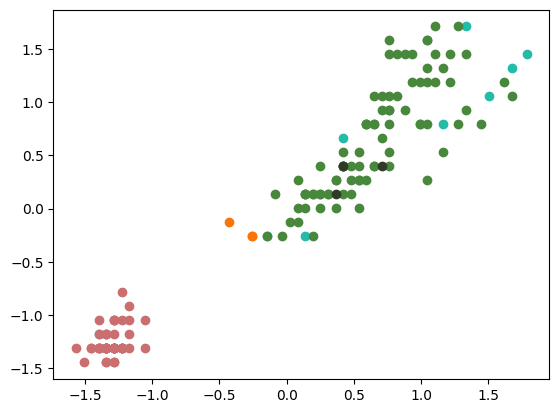

In [40]:
for i in range(len(li)):
  plt.scatter(li[i].iloc[:,2] , li[i].iloc[:,3] , color = color[i])
plt.show()

Agglomerative Clustering : Dendogram

In [41]:
hier_clus = AgglomerativeClustering(n_clusters = 3)
hier_clus.fit(X)

identified_cluster_hr = hier_clus.fit_predict(X)
identified_cluster_hr

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [42]:
temp1 = X[identified_cluster_hr == 0]
temp2 = X[identified_cluster_hr == 1]
temp3 = X[identified_cluster_hr == 2]

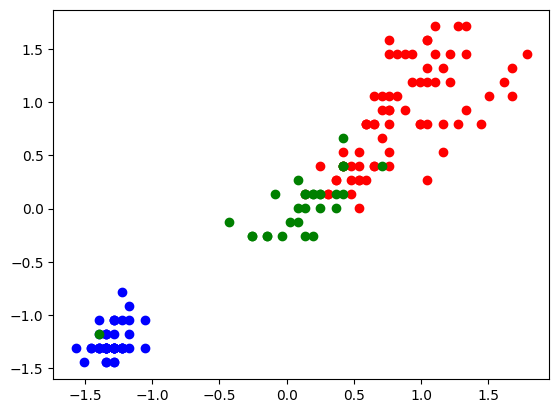

In [44]:
plt.scatter(temp1.iloc[:,2],temp1.iloc[:,3],color='red')
plt.scatter(temp2.iloc[:,2],temp2.iloc[:,3],color='blue')
plt.scatter(temp3.iloc[:,2],temp3.iloc[:,3],color='green')

In [45]:
from scipy.cluster import hierarchy


<function matplotlib.pyplot.show(close=None, block=None)>

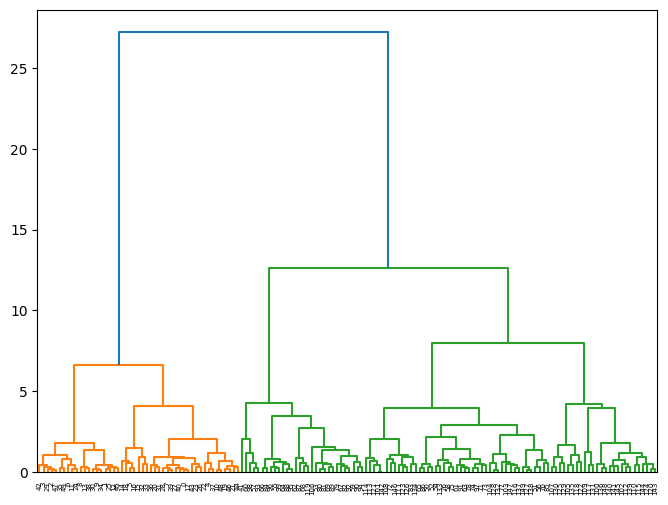

In [46]:
clusters = hierarchy.linkage(X,method='ward')
plt.figure(figsize=(8,6))
dendogram = hierarchy.dendrogram(clusters)
plt.show